In [3]:
class DisjointSet:    # Classe para representar um conjunto disjunto

    def __init__(self, n):
        # cria conjuntos disjuntos n (um para cada vértice)
        self.pai = {i: i for i in range(1, n + 1)}

    def Find(self, k):  # Encontra a raiz do conjunto ao qual o elemento k pertence
        # se `k` for raiz
        if self.pai[k] == k:
            return k

        # recursão até encontrar a raiz
        return self.Find(self.pai[k])

    def Union(self, a, b):  # Realiza união de dois subconjuntos
        # encontra a raiz dos conjuntos aos quais os elementos x e y pertencem
        x = self.Find(a)
        y = self.Find(b)

        self.pai[x] = y

# Função para construir a MST usando o algoritmo de Kruskal
def Kruskal(edges, n):
    MST = []  # armazena as arestas presentes no MST
    index = 0

    # Inicializa a classe DisjointSet e cria um conjunto disjunto para cada elemento
    ds = DisjointSet(n)

    # classifica as arestas aumentando o peso
    edges.sort(key=lambda x: x[2])

    # MST contém n-1 bordas
    while len(MST) != n - 1:

        # considera a próxima aresta com peso mínimo do gráfo
        (orig, dest, peso) = edges[index]
        index += 1 

        # encontra a raiz dos conjuntos para os quais dois
        # vértices da aresta pertencem
        x = ds.Find(orig)
        y = ds.Find(dest)

        # se ambos os vertices tiverem pais diferentes, eles pertencem a
        # diferentes componentes conectados e podem ser incluídos no MST
        if x != y:
            MST.append((orig, dest, peso))
            ds.Union(x, y)

    return MST


# Parte principal

if __name__ == "__main__":
    # Abrir a base de dados
    with open('jazzNew.net') as f:
        lines = f.readlines()

    # guardar numero de vertices
    _,nodes = lines[0].split()

    # Criar grafo
    grafo = {}
    for line in lines:
        if line.startswith('*'):
            continue

        orig, dest, peso = line.split()
        if orig not in grafo:
            grafo[orig] = {}
        if dest not in grafo:
            grafo[dest] = {}
        grafo[orig][dest] = peso
        grafo[dest][orig] = peso

    # Converter grafo em uma uma lista de vertices
    # (u, v, w) triples representam: vértice de partida `u` -> vértice de chegada `v` com peso `w`
    arestas = []
    for orig, neighbors in grafo.items():
        for dest, peso in neighbors.items():
            arestas.append((int(orig), int(dest), int(peso)))
    # Kruskal
    mst = Kruskal(arestas, int(nodes))

    # Output
    sumKm = 0
    for edge in mst:
        print(f'Pedro se deslocou da loja {edge[0]} até a loja {edge[1]} e percorreu {edge[2]}km.')
        sumKm += int(edge[2])
    print('-------- FIM DO PERCURSO --------')
    print(f'Pedro percorreu {sumKm}km.')



Pedro se deslocou da loja 81 até a loja 182 e percorreu 1km.
Pedro se deslocou da loja 98 até a loja 108 e percorreu 1km.
Pedro se deslocou da loja 99 até a loja 73 e percorreu 1km.
Pedro se deslocou da loja 153 até a loja 26 e percorreu 1km.
Pedro se deslocou da loja 153 até a loja 90 e percorreu 1km.
Pedro se deslocou da loja 153 até a loja 172 e percorreu 1km.
Pedro se deslocou da loja 167 até a loja 26 e percorreu 1km.
Pedro se deslocou da loja 167 até a loja 163 e percorreu 1km.
Pedro se deslocou da loja 172 até a loja 191 e percorreu 1km.
Pedro se deslocou da loja 173 até a loja 184 e percorreu 1km.
Pedro se deslocou da loja 57 até a loja 164 e percorreu 1km.
Pedro se deslocou da loja 73 até a loja 96 e percorreu 1km.
Pedro se deslocou da loja 75 até a loja 126 e percorreu 1km.
Pedro se deslocou da loja 140 até a loja 18 e percorreu 1km.
Pedro se deslocou da loja 196 até a loja 129 e percorreu 1km.
Pedro se deslocou da loja 10 até a loja 151 e percorreu 1km.
Pedro se deslocou da 

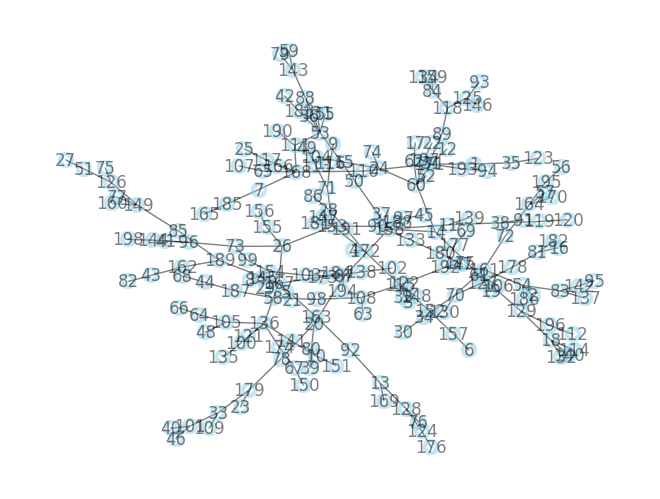

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df = {'origem': [], 'destino': [], 'peso': []}

#transforma a lista de tuplas mst em dicionário com chaves from (vértice de partida), to(vértice de destino) e peso
for i in range(len(mst)):
    df['origem'].append(mst[i][0])
    df['destino'].append(mst[i][1])
    df['peso'].append(mst[i][2])
        
# constroi o grafo
Grafo = nx.from_pandas_edgelist(df, 'origem', 'destino')
nx.draw(Grafo, with_labels=True, node_size=0.6, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=10)
plt.show()